In [2]:
import hnswlib
import numpy as np
import pickle
from src.cnn.use_pretrained import get_image_feature
from PIL import Image

/home/dseg/miniconda3/envs/fm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dim = 512
with open('output/dataset/oxbuild/image_list.txt', 'r') as fin:
    image_list = fin.readlines()
with open('output/dataset/oxbuild/features.pkl', 'rb') as fin:
    data: np.ndarray = pickle.load(fin)

In [4]:
num_elements = len(image_list)
ids = np.arange(num_elements)

p = hnswlib.Index(space='l2', dim=dim)
p.init_index(max_elements=num_elements, ef_construction=200, M=16)
p.add_items(data, ids)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as img 

Using cache found in /home/dseg/.cache/torch/hub/pytorch_vision_v0.10.0


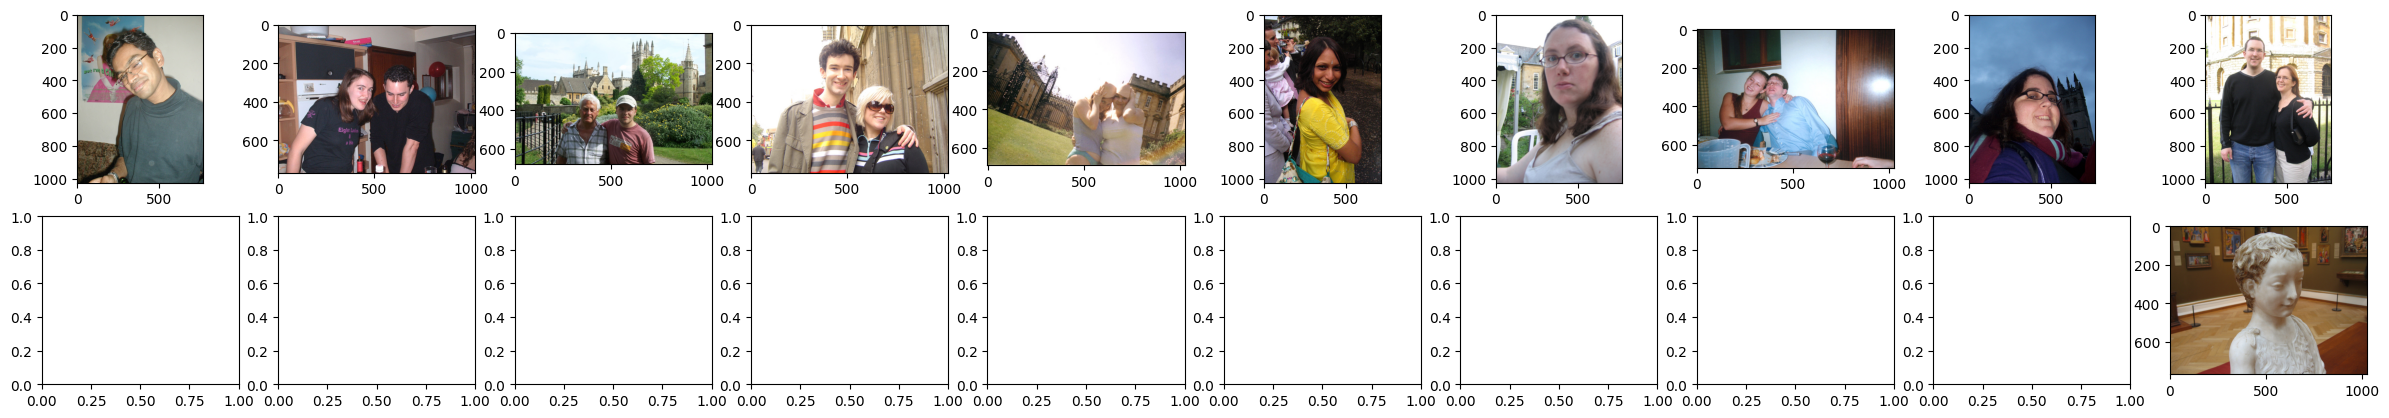

In [11]:
k = 10
fig, axes = plt.subplots(nrows=2, ncols=k)
fig.set_figwidth(30)

target_img = Image.open('dataset/oxbuild/images/ashmolean_000309.jpg')
plt.imshow(target_img)
feat = get_image_feature(target_img)
labels, distances = p.knn_query(feat, k=k)

res = []
for (idx, i) in enumerate(labels.squeeze()):
    axes[0, idx].imshow(img.imread(image_list[i].strip()))
plt.show()